# Make Plots in Preparation for the Publication
These are just draft to see if everything looks like it should be.

#### Plots included:
1) Projection of WDS Systems on the sky 
2) Projection of queried systems on the sky
3) Angular Separation Histogram 
4) Physical Separation Histogram
5) Delta-Mag Plot
6) Mag-Mag Plot
7) Color Magnitude 
8) Delta-Mu / Delta-Mu_orbit
9) Proper Motion Difference Histogram

In [272]:
from astropy.table import Table, vstack 
from astropy.io import ascii
from astropy.coordinates import SkyCoord, Angle, Distance
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
from numpy import mean, median, std, log, exp
%matplotlib inline
plt.style.use('seaborn-deep')

## Access the default color cycle from the style sheet

In [273]:
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
wds_color = default_colors[0] 
all_color = default_colors[5]
as_color = default_colors[2]
non_color = default_colors[1]

## Read in the wds table, query results table and the sorted results (so we can look at all the objects together as well as the sorted systems)

In [274]:
directory = '/home/sc36/dzakarian_wsl/wds_gaia_project/WDS_Gaia/'
wds_tab = Table.read(f'{directory}wdstab6-27.ecsv', header_start=0, data_start=1) 

query_results_tab = Table.read(f'{directory}/stack_query_results_table_fixed4-20.ecsv', header_start=0, data_start=1) 
index_error_queries = Table.read(f'{directory}/stack_index_error_queries_fixed4-20.ecsv', header_start=0, data_start=1) 

associated_systems_tab = Table.read(f'{directory}/associated_systems_table_fixed4-20.ecsv', header_start=0, data_start=1) 
non_associated_systems_tab = Table.read(f'{directory}/non_associated_systems_table_fixed4-20.ecsv', header_start=0, data_start=1) 

## if the first row is empty, delete the row... 
if associated_systems_tab[0]['ra_a'] == 0.0:
    associated_systems_tab.remove_row(0)



#### view columns for each table

In [275]:
wds_tab.info

<Table length=154513>
     name       dtype    unit      class     n_bad
-------------- ------- -------- ------------ -----
WDS Identifier   str13                Column     0
       Epoch-1   int64       yr       Column     0
       Epoch-2   int64       yr       Column     0
       Theta-1   int64      deg       Column     0
       Theta-2   int64      deg       Column     0
         Rho-1 float64   arcsec       Column     0
         Rho-2 float64   arcsec       Column     0
       Mag-pri    str5      mag       Column     0
       Mag-sec    str4      mag       Column     0
      PMpri-RA float64 mas / yr MaskedColumn  1959
     PMpri-DEC float64 mas / yr MaskedColumn  1958
      PMsec-RA float64 mas / yr MaskedColumn 47601
     PMsec-DEC float64 mas / yr MaskedColumn 47600
       WDS_RA"    str9                Column     0
      WDS_DEC"    str9                Column     0
      RAprideg float64      deg       Column     0
     DECprideg float64      deg       Column     0
         

In [276]:
query_results_tab.info

<Table length=93390>
             name               dtype    unit   n_bad
------------------------------ ------- -------- -----
                wds_identifier   str13              0
                    wds_rownum   int64              0
                   source_id_a   str19              0
                   source_id_b   str19              0
                   ref_epoch_a float64              0
                   ref_epoch_b float64              0
                          ra_a float64      deg     0
                          ra_b float64      deg     0
                    ra_error_a float64      mas     0
                    ra_error_b float64      mas     0
                         dec_a float64      deg     0
                         dec_b float64      deg     0
                   dec_error_a float64      mas     0
                   dec_error_b float64      mas     0
                    parallax_a float64      mas     0
                    parallax_b float64      mas     0
       

In [277]:
associated_systems_tab.info

<Table length=31407>
             name               dtype     unit    n_bad
------------------------------ ------- ---------- -----
                wds_identifier   str13                0
                    wds_rownum   int64                0
                   source_id_a   str19                0
                   source_id_b   str19                0
                   ref_epoch_a float64                0
                   ref_epoch_b float64                0
                          ra_a float64        deg     0
                          ra_b float64        deg     0
                    ra_error_a float64        mas     0
                    ra_error_b float64        mas     0
                         dec_a float64        deg     0
                         dec_b float64        deg     0
                   dec_error_a float64        mas     0
                   dec_error_b float64        mas     0
                    parallax_a float64        mas     0
                    paralla

## Plot 1) Projection of the WDS Sources on the Sky 

i) RA + Dec

/tmp/ipykernel_195/3593326022.py:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')


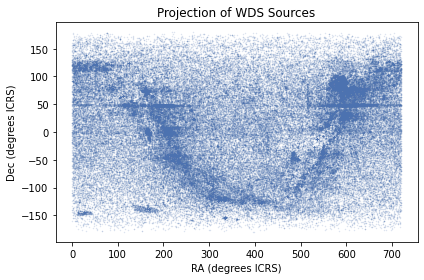

In [304]:
title='Projection of WDS Sources'
save_title=title.replace(' ', '_')
ras = wds_tab['RApri-prepped'] + wds_tab['RAsec-prepped']
decs = wds_tab['DECpri-prepped'] + wds_tab['DECsec-prepped']
plt.figure(figsize=(6, 4))
plt.scatter(ras, decs, color= wds_color, marker='o', alpha=0.2, s=.2)
plt.xlabel("RA (degrees ICRS)")
plt.ylabel("Dec (degrees ICRS)")
plt.title(title)
# Use tight_layout
plt.tight_layout()
plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')
plt.show()

ii) Galactic Coordinates

/tmp/ipykernel_195/4094044602.py:35: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')


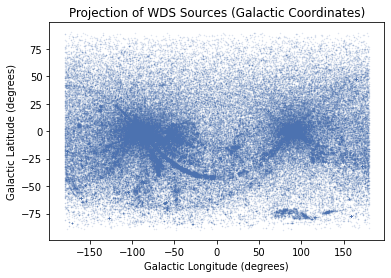

In [303]:
# Define the Galactic coordinate transformation function
def equatorial_to_galactic(ra, dec):
    # Convert RA and Dec to radians
    ra_rad = np.radians(ra)
    dec_rad = np.radians(dec)

    # Define the Galactic center in equatorial coordinates
    l0 = np.radians(0)  # Galactic center longitude in radians
    b0 = np.radians(0)  # Galactic center latitude in radians

    # Calculate Galactic longitude (l) and latitude (b)
    l = np.arctan2(np.sin(ra_rad - l0), np.cos(dec_rad) * np.tan(b0) - np.sin(dec_rad) * np.cos(ra_rad - l0))
    b = np.arcsin(np.sin(dec_rad) * np.sin(b0) + np.cos(dec_rad) * np.cos(b0) * np.cos(ra_rad - l0))

    # Convert l and b back to degrees
    l_deg = np.degrees(l)
    b_deg = np.degrees(b)

    return l_deg, b_deg

# Assuming you have a table of equatorial coordinates in 'ras' and 'decs'
# Convert equatorial coordinates to Galactic coordinates
galactic_coords = [equatorial_to_galactic(ra, dec) for ra, dec in zip(ras, decs)]
l_values, b_values = zip(*galactic_coords)

title='Projection of WDS Sources (Galactic Coordinates)'
save_title=title.replace(' ', '_')

# Create the plot in Galactic coordinates
plt.figure(figsize=(6, 4))
plt.scatter(l_values, b_values, color=wds_color, marker='o', alpha=0.2, s=0.2)
plt.xlabel("Galactic Longitude (degrees)")
plt.ylabel("Galactic Latitude (degrees)")
plt.title(title)
plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')

## Plot 2) Projection of the WDS-Gaia Sources on the Sky

a] Both together (distinguished by color)

b] Just the physical pairs

c] Just the non-physical pairs

#### A) all query results

/tmp/ipykernel_195/2725515912.py:16: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')


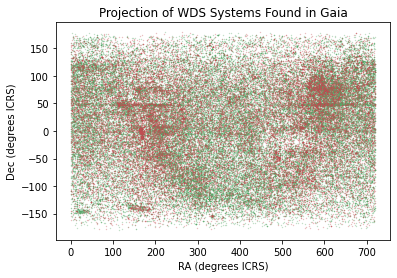

In [280]:
as_ras = associated_systems_tab['ra_a'] + associated_systems_tab['ra_b']
as_decs = associated_systems_tab['dec_a'] + associated_systems_tab['dec_b']
non_ras = non_associated_systems_tab['ra_a'] + non_associated_systems_tab['ra_b']
non_decs = non_associated_systems_tab['dec_a'] + non_associated_systems_tab['dec_b']

title = 'Projection of WDS Systems Found in Gaia'
save_title=title.replace(' ', '_')

plt.figure(figsize=(6, 4))
plt.scatter(non_ras, non_decs, color=non_color, alpha=0.5, s=.1)
plt.scatter(as_ras, as_decs, color = as_color, alpha=0.5, s=.1) 

plt.xlabel("RA (degrees ICRS)")
plt.ylabel("Dec (degrees ICRS)")
plt.title(title)
plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')



#### B) Associated Pairs

/tmp/ipykernel_195/1707614710.py:13: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')


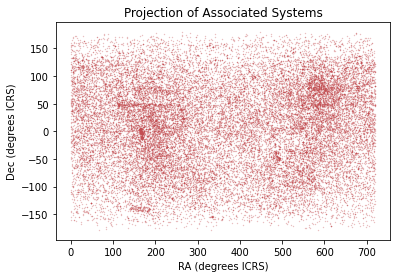

In [281]:
as_ras = associated_systems_tab['ra_a'] + associated_systems_tab['ra_b']
as_decs = associated_systems_tab['dec_a'] + associated_systems_tab['dec_b']

title = 'Projection of Associated Systems'
save_title=title.replace(' ', '_')

plt.figure(figsize=(6, 4))
plt.scatter(as_ras, as_decs, color=as_color, marker='o', alpha=0.5, s=.1) 

plt.xlabel("RA (degrees ICRS)")
plt.ylabel("Dec (degrees ICRS)")
plt.title(title)
plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')

/tmp/ipykernel_195/3691321609.py:13: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')


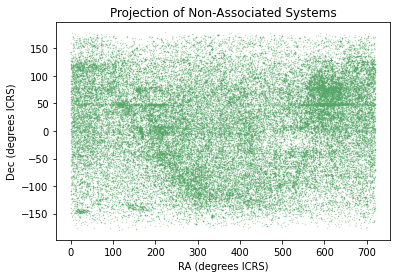

In [282]:
non_ras = non_associated_systems_tab['ra_a'] + non_associated_systems_tab['ra_b']
non_decs = non_associated_systems_tab['dec_a'] + non_associated_systems_tab['dec_b']

title = 'Projection of Non-Associated Systems'
save_title=title.replace(' ', '_')

plt.figure(figsize=(6, 4))
plt.scatter(non_ras, non_decs, color=non_color, alpha=0.5, s=.1)

plt.xlabel("RA (degrees ICRS)")
plt.ylabel("Dec (degrees ICRS)")
plt.title(title)
plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')


## Plot 3) Angular Separation Histogram
a] Both together (distinguished by color)

b] Just the physical pairs

c] Just the non-physical pairs

#### A) WDS 

In [283]:
ra_as = wds_tab['RApri-prepped'] 
ra_bs = wds_tab['RAsec-prepped']
dec_as = wds_tab['DECpri-prepped'] 
dec_bs = wds_tab['DECsec-prepped']

acoords = SkyCoord(ra_as, dec_as, frame='icrs')
bcoords = SkyCoord(ra_bs, dec_bs, frame='icrs')


# calcualte the separation between the two objects
wds_seps = acoords.separation(bcoords).to(u.arcsec).value


/tmp/ipykernel_195/2809430748.py:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')


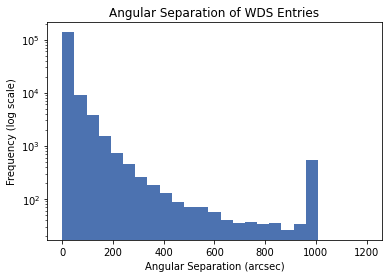

In [284]:
title = 'Angular Separation of WDS Entries'
save_title = title.replace(' ', '_')


plt.figure(figsize=(6, 4))
plt.hist(wds_seps, bins=25, range=(0, 1200), color=wds_color, log=True)
plt.title(title)
plt.xlabel('Angular Separation (arcsec)')
plt.ylabel('Frequency (log scale)')
# plt.xlim(0, 100)
# plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')

#### B) All Query Results

In [285]:
all_seps = np.concatenate((associated_systems_tab['separation'], non_associated_systems_tab['separation']))

/tmp/ipykernel_195/1097341123.py:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')


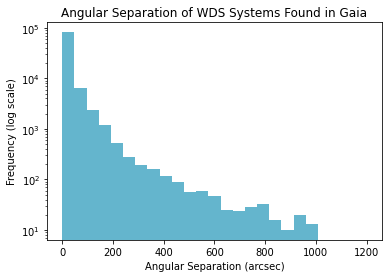

In [286]:
title = 'Angular Separation of WDS Systems Found in Gaia'
save_title = title.replace(' ', '_')


plt.figure(figsize=(6, 4))
plt.hist(all_seps, bins=25, range=(0, 1200), color=all_color, log=True)
plt.title(title)
plt.xlabel('Angular Separation (arcsec)')
plt.ylabel('Frequency (log scale)')
# plt.xlim(0, 100)
# plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')

#### C) Associated Systems

In [287]:
as_seps = associated_systems_tab['separation']

/tmp/ipykernel_195/2946153992.py:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')


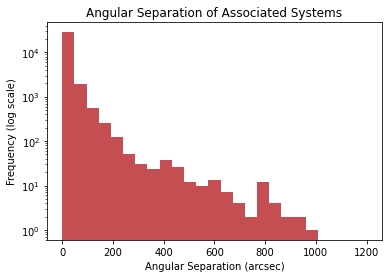

In [288]:
title = 'Angular Separation of Associated Systems'
save_title = title.replace(' ', '_')


plt.figure(figsize=(6, 4))
plt.hist(as_seps, bins=25, range=(0, 1200), color=as_color, log=True)
plt.title(title)
plt.xlabel('Angular Separation (arcsec)')
plt.ylabel('Frequency (log scale)')
# plt.xlim(0, 100)
# plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')

#### D) Non-Associated Systems

In [289]:
non_seps = non_associated_systems_tab['separation']

/tmp/ipykernel_195/245599786.py:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')


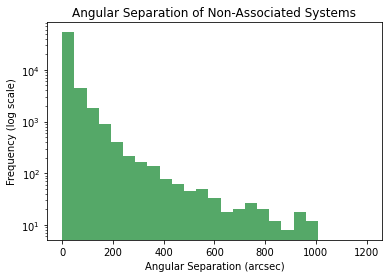

In [290]:
title = 'Angular Separation of Non-Associated Systems'
save_title = title.replace(' ', '_')


plt.figure(figsize=(6, 4))
plt.hist(non_seps, bins=25, range=(0, 1200), color=non_color, log=True)
plt.title(title)
plt.xlabel('Angular Separation (arcsec)')
plt.ylabel('Frequency (log scale)')
# plt.xlim(0, 125)
# plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')

## <span style="color:hotpink">**Plot 4) Physical Separation Histogram**</span>

**NOTE: These are in log scale!!!**

a] Both together (distinguished by color)

b] Just the physical pairs

bii) Projected physical separation at brighter object's distance

c] Just the non-physical pairs

#### i) Calculate 3d separation between each pair

In [291]:
# Read in the coordinates

as_ra_a = associated_systems_tab['ra_a']
as_ra_b = associated_systems_tab['ra_b']
as_dec_a = associated_systems_tab['dec_a'] 
as_dec_b = associated_systems_tab['dec_b']

non_ra_a = non_associated_systems_tab['ra_a'] 
non_ra_b = non_associated_systems_tab['ra_b']
non_dec_a = non_associated_systems_tab['dec_a'] 
non_dec_b = non_associated_systems_tab['dec_b']

# read in the parallax
# the original measurements are in mas, but I want to read in the parallax in arcsec
# I checked - this correctly reads in parallax in arcsec
as_parallax_a = associated_systems_tab['parallax_a'].to(u.arcsec)
as_parallax_b = associated_systems_tab['parallax_b'].to(u.arcsec)
non_parallax_a = non_associated_systems_tab['parallax_a'].to(u.arcsec)
non_parallax_b = non_associated_systems_tab['parallax_b'].to(u.arcsec)

# calculate the distances in pc as 1/parallax[arcsec]
as_dist_a = 1 / as_parallax_a
as_dist_b = 1 / as_parallax_b
non_dist_a = 1 / non_parallax_a
non_dist_b = 1 / non_parallax_b

# distance is now in units of pc but astropy doesn't recognize this conversion from 1/arcsec (because it's not universal)
# so, fix the units manually
as_dist_a = as_dist_a*u.arcsec*u.pc
as_dist_b = as_dist_b*u.arcsec*u.pc
non_dist_a = non_dist_a*u.arcsec*u.pc
non_dist_b = non_dist_b*u.arcsec*u.pc

In [292]:
# make skycoord objects of the objects at their phsysical distances

as_obj_a = SkyCoord(ra=as_ra_a, dec=as_dec_a, distance=as_dist_a )
as_obj_b = SkyCoord(ra=as_ra_b, dec=as_dec_b, distance=as_dist_b )

non_obj_a = SkyCoord(ra=non_ra_a, dec=non_dec_a, distance=non_dist_a )
non_obj_b = SkyCoord(ra=non_ra_b, dec=non_dec_b, distance=non_dist_b )

# physical separations are calculated using astropy
as_phys_seps = np.concatenate([as_obj_a.separation_3d(as_obj_b).value])
non_phys_seps = np.concatenate([non_obj_a.separation_3d(non_obj_b).value])
all_phys_seps = np.concatenate([as_phys_seps, non_phys_seps])


ii) Calculate the nominal separations (aka the separations if both objects were at the same distance)

In [293]:
# Find the nominal distances to each object...
# this is to check the projected separations if both components were at the distance of the brighter object

# pi is the symbol for parallax
# each pair will be set to the distance of the brighter object
# these lists will store the correct parallax depending on the mags of each pair
as_pis = []
non_pis = []

# find brighter component and its parallax for associated systems
for row in range(len(associated_systems_tab)):
    mag_a = associated_systems_tab['phot_g_mean_mag_a'][row]
    mag_b = associated_systems_tab['phot_g_mean_mag_b'][row]
    if mag_a < mag_b:
        as_pis.append(associated_systems_tab[row]['parallax_a'])
        
    else:
        as_pis.append(associated_systems_tab[row]['parallax_b'])

# find brighter component and its parallax for non-associated systems
for row in range(len(non_seps)):
    mag_a = non_associated_systems_tab['phot_g_mean_mag_a'][row]
    mag_b = non_associated_systems_tab['phot_g_mean_mag_b'][row]
    if mag_a < mag_b:
        non_pis.append(non_associated_systems_tab[row]['parallax_a'])
        
    else:
        non_pis.append(non_associated_systems_tab[row]['parallax_b'])

# convert parallax from arcsec to mas
as_pis = np.array(as_pis)
as_pis = as_pis*u.mas
as_pis = as_pis.to(u.arcsec)

# parallaxes -> distances
# the nominal distances are simply the brighter object distance
# used to calculate the projected physical separation
as_nom_dists = 1/ as_pis
as_nom_dists = as_nom_dists*u.pc*u.arcsec



# nominal separations calculated by putting both objects at the same (nominal) distance for the system
as_nom_obj_a = SkyCoord(ra=as_ra_a, dec=as_dec_a, distance=as_nom_dists )
as_nom_obj_b = SkyCoord(ra=as_ra_b, dec=as_dec_b, distance=as_nom_dists )

as_nominal_seps = np.concatenate([as_nom_obj_a.separation_3d(as_nom_obj_b).value])

#### A) All Query Results

/tmp/ipykernel_195/2720043870.py:13: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')


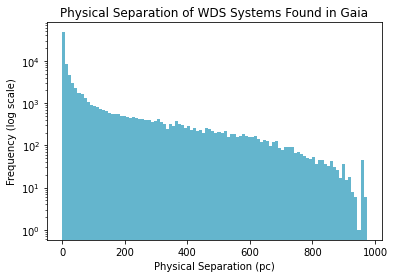

In [294]:
title = 'Physical Separation of WDS Systems Found in Gaia'
save_title = title.replace(' ', '_')


plt.figure(figsize=(6, 4))
# plt.hist(all_phys_seps, bins=25, range=(0, 100), color=all_color, log=True)
plt.hist(all_phys_seps, bins=100, color=all_color, log=True)
plt.title(title)
plt.xlabel('Physical Separation (pc)')
plt.ylabel('Frequency (log scale)')
# plt.xlim(0, 1000)
# plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')

#### B) Associated Systems

i) 3d separation

/tmp/ipykernel_195/1685339953.py:16: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')


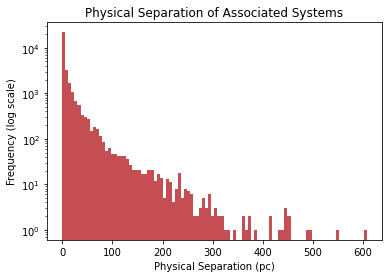

In [306]:
# Switching to log=True shows the larger separations

title = 'Physical Separation of Associated Systems'
save_title = title.replace(' ', '_')


plt.figure(figsize=(6, 4))
# plt.hist(all_phys_seps, bins=25, range=(0, 100), color=all_color, log=True)
plt.hist(as_phys_seps, bins=100, color=as_color, log=True)
plt.title(title)
# plt.ylim(0,2500)
plt.xlabel('Physical Separation (pc)')
plt.ylabel('Frequency (log scale)')
# plt.xlim(0, 1000)
# plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')

ii) Projected physical separation 

/tmp/ipykernel_195/3724095705.py:13: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')


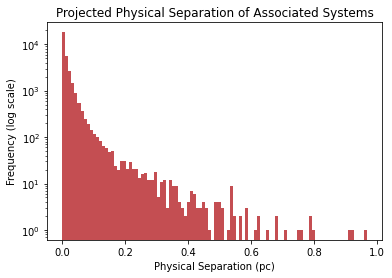

In [296]:
title = 'Projected Physical Separation of Associated Systems'
save_title = title.replace(' ', '_')


plt.figure(figsize=(6, 4))
# plt.hist(all_phys_seps, bins=25, range=(0, 100), color=all_color, log=True)
plt.hist(as_nominal_seps, bins=100, color=as_color, log=True)
plt.title(title)
plt.xlabel('Physical Separation (pc)')
plt.ylabel('Frequency (log scale)')
# plt.xlim(0, 1000)
# plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')

#### C) Non-Associated Systems

/tmp/ipykernel_195/1838894553.py:13: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')


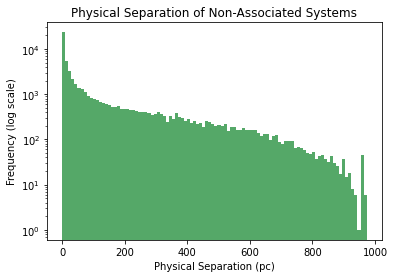

In [297]:
title = 'Physical Separation of Non-Associated Systems'
save_title = title.replace(' ', '_')


plt.figure(figsize=(6, 4))
# plt.hist(all_phys_seps, bins=25, range=(0, 100), color=all_color, log=True)
plt.hist(non_phys_seps, bins=100, color=non_color, log=True)
plt.title(title)
plt.xlabel('Physical Separation (pc)')
plt.ylabel('Frequency (log scale)')
# plt.xlim(0, 1000)
# plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')

## Plot 5) Delta-Mag Histogram

a] Both together (distinguished by color)

b] Just the physical pairs

c] Just the non-physical pairs

In [298]:

# Convert the lists to NumPy arrays
as_mag_a = np.array(associated_systems_tab['phot_g_mean_mag_a'])
as_mag_a = as_mag_a.astype(float)  # Ensure the values are treated as floats

as_mag_b = np.array(associated_systems_tab['phot_g_mean_mag_b'])
as_mag_b = as_mag_b.astype(float)  # Ensure the values are treated as floats

# Calculate the absolute differences
as_delta_mag = np.abs(as_mag_a - as_mag_b)

# Repeat the same process for non-associated systems
non_mag_a = np.array(non_associated_systems_tab['phot_g_mean_mag_a'])
non_mag_a = non_mag_a.astype(float)

non_mag_b = np.array(non_associated_systems_tab['phot_g_mean_mag_b'])
non_mag_b = non_mag_b.astype(float)

non_delta_mag = np.abs(non_mag_a - non_mag_b)

# Concatenate the results into all_delta_mag
all_delta_mag = np.concatenate([as_delta_mag, non_delta_mag])

all_delta_mag

#### A) All Systems

/tmp/ipykernel_195/186442743.py:14: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')


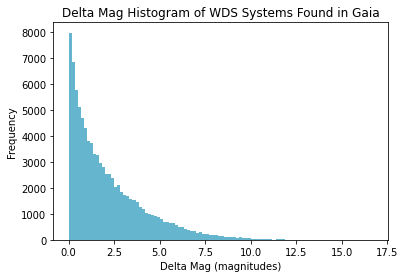

In [309]:
title = 'Delta Mag Histogram of WDS Systems Found in Gaia'
save_title = title.replace(' ', '_')


plt.figure(figsize=(6, 4))
# plt.hist(all_phys_seps, bins=25, range=(0, 100), color=all_color, log=True)
plt.hist(all_delta_mag, bins=100, color=all_color)
plt.title(title)
# plt.ylim(0,2500)
plt.xlabel('Delta Mag (magnitudes)')
plt.ylabel('Frequency')
# plt.xlim(0, 1000)
# plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')

#### B) Associated Systems

/tmp/ipykernel_195/3288580250.py:14: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')


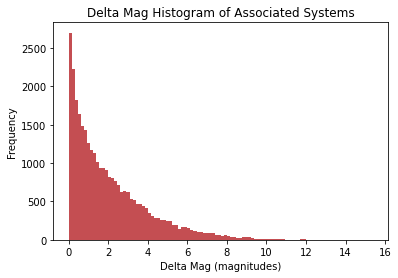

In [307]:
title = 'Delta Mag Histogram of Associated Systems'
save_title = title.replace(' ', '_')


plt.figure(figsize=(6, 4))
# plt.hist(all_phys_seps, bins=25, range=(0, 100), color=all_color, log=True)
plt.hist(as_delta_mag, bins=100, color=as_color)
plt.title(title)
# plt.ylim(0,2500)
plt.xlabel('Delta Mag (magnitudes)')
plt.ylabel('Frequency')
# plt.xlim(0, 1000)
# plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')

#### C) Non-Associated Systems

/tmp/ipykernel_195/1963324379.py:14: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')


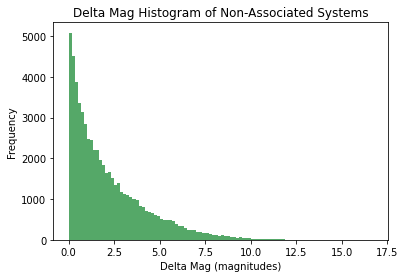

In [308]:
title = 'Delta Mag Histogram of Non-Associated Systems'
save_title = title.replace(' ', '_')


plt.figure(figsize=(6, 4))
# plt.hist(all_phys_seps, bins=25, range=(0, 100), color=all_color, log=True)
plt.hist(non_delta_mag, bins=100, color=non_color)
plt.title(title)
# plt.ylim(0,2500)
plt.xlabel('Delta Mag (magnitudes)')
plt.ylabel('Frequency')
# plt.xlim(0, 1000)
# plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')

## Plot 6) Mag vs Mag plot

a] Both together (distinguished by color)

b] Just the physical pairs

c] Just the non-physical pairs

In [302]:
as_mag_a = associated_systems_tab['phot_g_mean_mag_a']
as_mag_b = associated_systems_tab['phot_g_mean_mag_b']
non_mag_a = non_associated_systems_tab['phot_g_mean_mag_a']
non_mag_b = non_associated_systems_tab['phot_g_mean_mag_b']

#### A) All Systems

/tmp/ipykernel_195/1098452148.py:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')


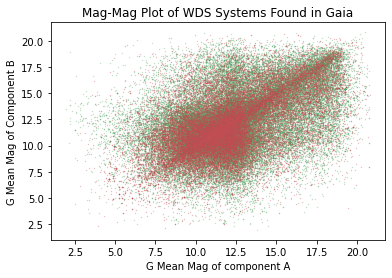

In [247]:
title = 'Mag-Mag Plot of WDS Systems Found in Gaia'
save_title=title.replace(' ', '_')

plt.figure(figsize=(6, 4))
plt.scatter(non_mag_a, non_mag_b, color=non_color,  alpha=0.5, s=.1)
plt.scatter(as_mag_a, as_mag_b, color = as_color,  alpha=0.5, s=.1
            ) 

plt.xlabel("G Mean Mag of component A")
plt.ylabel("G Mean Mag of Component B")
plt.title(title)
plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')



#### Associated Systems

/tmp/ipykernel_195/1009084764.py:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')


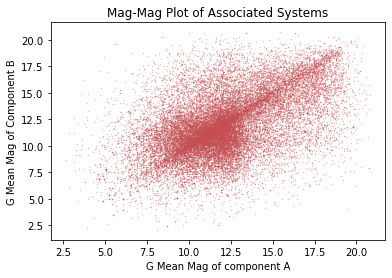

In [249]:
title = 'Mag-Mag Plot of Associated Systems'
save_title=title.replace(' ', '_')

plt.figure(figsize=(6, 4))
plt.scatter(as_mag_a, as_mag_b, color = as_color, alpha=0.5, s=.1) 

plt.xlabel("G Mean Mag of component A")
plt.ylabel("G Mean Mag of Component B")
plt.title(title)
plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')

#### Non-Associated Systems

/tmp/ipykernel_195/1723312030.py:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')


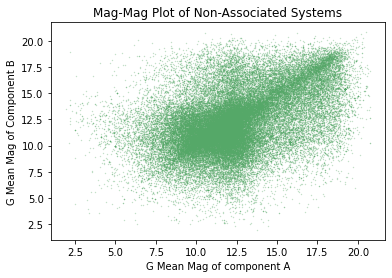

In [250]:
title = 'Mag-Mag Plot of Non-Associated Systems'
save_title=title.replace(' ', '_')

plt.figure(figsize=(6, 4))
plt.scatter(non_mag_a, non_mag_b, color=non_color, alpha=0.5, s=.1)

plt.xlabel("G Mean Mag of component A")
plt.ylabel("G Mean Mag of Component B")
plt.title(title)
plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')

### Plot 7) Color Magnitude Diagram

a] Both together (distinguished by color)

b] Just the physical pairs

c] Just the non-physical pairs

In [253]:
as_mag_a = associated_systems_tab['phot_g_mean_mag_a']
as_mag_b = associated_systems_tab['phot_g_mean_mag_b']
non_mag_a = non_associated_systems_tab['phot_g_mean_mag_a']
non_mag_b = non_associated_systems_tab['phot_g_mean_mag_b']

as_bprp_a = associated_systems_tab['bp_rp_a']
as_bprp_b = associated_systems_tab['bp_rp_b']
non_bprp_a = non_associated_systems_tab['bp_rp_a']
non_bprp_b = non_associated_systems_tab['bp_rp_b']

#### A) All Systems

/tmp/ipykernel_195/2540440452.py:15: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')


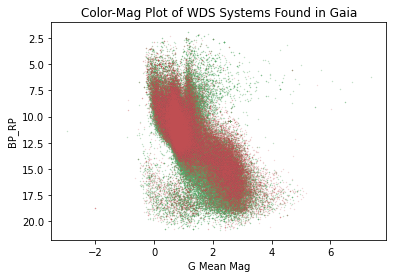

In [257]:
title = 'Color-Mag Plot of WDS Systems Found in Gaia'
save_title=title.replace(' ', '_')

plt.figure(figsize=(6, 4))
plt.scatter(non_bprp_a, non_mag_a, color=non_color, alpha=0.5, s=.1)
plt.scatter(non_bprp_b, non_mag_b, color=non_color, alpha=0.5, s=.1)
plt.scatter(as_bprp_a, as_mag_a, color = as_color, alpha=0.3, s=.1) 
plt.scatter(as_bprp_b, as_mag_b, color = as_color, alpha=0.3, s=.1) 

plt.gca().invert_yaxis()

plt.xlabel("G Mean Mag")
plt.ylabel("BP_RP")
plt.title(title)
plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')


#### B) Associated Systems

/tmp/ipykernel_195/4265083860.py:14: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')


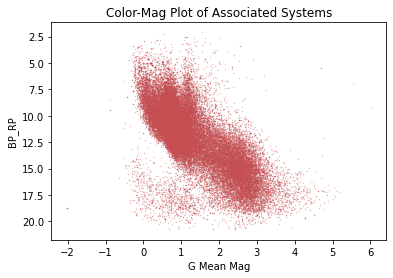

In [258]:
title = 'Color-Mag Plot of Associated Systems'
save_title=title.replace(' ', '_')

plt.figure(figsize=(6, 4))

plt.scatter(as_bprp_a, as_mag_a, color = as_color, alpha=0.5, s=.1) 
plt.scatter(as_bprp_b, as_mag_b, color = as_color, alpha=0.5, s=.1) 

plt.gca().invert_yaxis()

plt.xlabel("G Mean Mag")
plt.ylabel("BP_RP")
plt.title(title)
plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')


#### Non-Associated Systems

/tmp/ipykernel_195/2379741044.py:13: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')


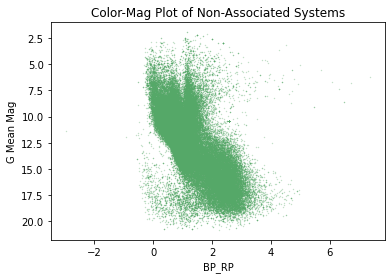

In [260]:
title = 'Color-Mag Plot of Non-Associated Systems'
save_title=title.replace(' ', '_')

plt.figure(figsize=(6, 4))
plt.scatter(non_bprp_a, non_mag_a, color=non_color, alpha=0.5, s=.1)
plt.scatter(non_bprp_b, non_mag_b, color=non_color, alpha=0.5, s=.1)

plt.gca().invert_yaxis()

plt.ylabel("G Mean Mag")
plt.xlabel("BP_RP")
plt.title(title)
plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')

## Plot 8) Delta Mu / Delta Mu orbit Histogram
this is bascically the change in proper motion scaled by the distance to the system

a] Both together (distinguished by color)

b] Just the physical pairs

c] Just the non-physical pairs

In [197]:
as_delta_mu_over_orbit = np.array(associated_systems_tab['delta_mu']/associated_systems_tab['delta_mu_orbit'])
non_delta_mu_over_orbit = np.array(non_associated_systems_tab['delta_mu']/non_associated_systems_tab['delta_mu_orbit'])

all_delta_mu_over_orbit = np.concatenate([as_delta_mu_over_orbit, non_delta_mu_over_orbit])

#### A) All Systems

/tmp/ipykernel_195/742944815.py:14: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')


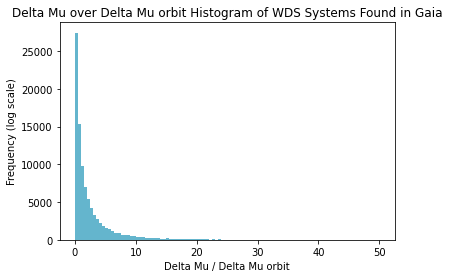

In [211]:
title = 'Delta Mu over Delta Mu orbit Histogram of WDS Systems Found in Gaia'
save_title = title.replace(' ', '_')


plt.figure(figsize=(6, 4))

plt.hist(all_delta_mu_over_orbit, bins=100, color=all_color, range=(0,50)) # note: these crop off the outliers
plt.title(title)
# plt.ylim(0,2500)
plt.xlabel('Delta Mu / Delta Mu orbit')
plt.ylabel('Frequency (log scale)')
# plt.xlim(0, 1000)
# plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')

#### B) Associated Systems

/tmp/ipykernel_195/2622438124.py:14: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')


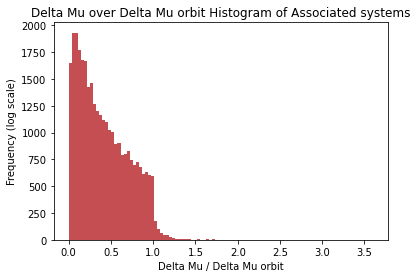

In [212]:
title = 'Delta Mu over Delta Mu orbit Histogram of Associated systems'
save_title = title.replace(' ', '_')


plt.figure(figsize=(6, 4))

plt.hist(as_delta_mu_over_orbit, bins=100, color=as_color)
plt.title(title)
# plt.ylim(0,2500)
plt.xlabel('Delta Mu / Delta Mu orbit')
plt.ylabel('Frequency (log scale)')
# plt.xlim(0, 1000)
# plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')

Non-Associated Systems

/tmp/ipykernel_195/2221865335.py:14: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')


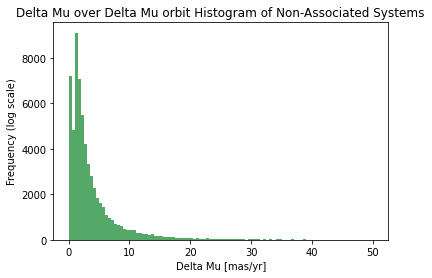

In [213]:
title = 'Delta Mu over Delta Mu orbit Histogram of Non-Associated Systems'
save_title = title.replace(' ', '_')


plt.figure(figsize=(6, 4))

plt.hist(non_delta_mu_over_orbit, bins=100, color=non_color, range=(0,50)) # note: these crop off the outliers
plt.title(title)
# plt.ylim(0,2500)
plt.xlabel('Delta Mu [mas/yr]')
plt.ylabel('Frequency (log scale)')
# plt.xlim(0, 50)
# plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')

## Plot 9) Proper Motion Difference

a] Both together (distinguished by color)

b] Just the physical pairs

c] Just the non-physical pairs

In [218]:
as_pmra_diff = abs(associated_systems_tab['pmra_a']- associated_systems_tab['pmra_b'])
non_pmra_diff = abs(non_associated_systems_tab['pmra_a']- non_associated_systems_tab['pmra_b'])

as_pmdec_diff = abs(associated_systems_tab['pmdec_a']- associated_systems_tab['pmdec_b'])
non_pmdec_diff = abs(non_associated_systems_tab['pmdec_a']- non_associated_systems_tab['pmdec_b'])

#### A) All Systems 

/tmp/ipykernel_195/856478316.py:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')


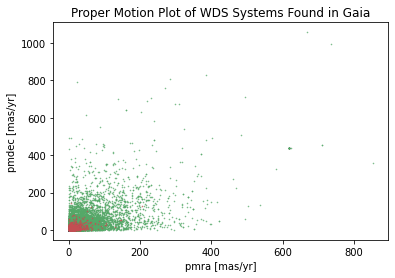

In [271]:
title = 'Proper Motion Plot of WDS Systems Found in Gaia'
save_title=title.replace(' ', '_')


plt.scatter(non_pmra_diff, non_pmdec_diff, color=non_color, alpha=0.8, s=.3)
plt.scatter(as_pmra_diff, as_pmdec_diff, color = as_color, alpha=0.8, s=.3) 


plt.xlabel("pmra [mas/yr]")
plt.ylabel("pmdec [mas/yr]")
plt.title(title)
plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')

#### B) Associated Systems

/tmp/ipykernel_195/1814353247.py:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')


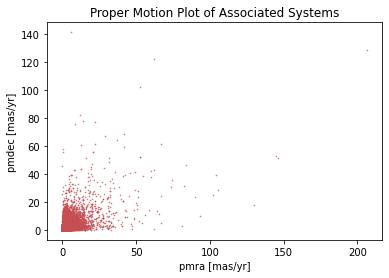

In [267]:
title = 'Proper Motion Plot of Associated Systems'
save_title=title.replace(' ', '_')

plt.scatter(as_pmra_diff, as_pmdec_diff, color = as_color, alpha=0.8, s=.3) 


plt.xlabel("pmra [mas/yr]")
plt.ylabel("pmdec [mas/yr]")
plt.title(title)
plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')

#### C) Non-Associated Systems

/tmp/ipykernel_195/194616102.py:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')


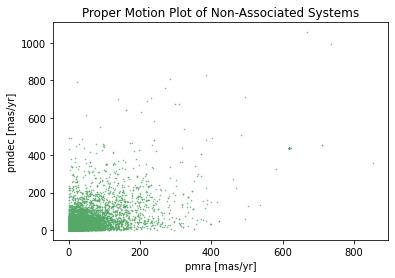

In [268]:
title = 'Proper Motion Plot of Non-Associated Systems'
save_title=title.replace(' ', '_')


plt.scatter(non_pmra_diff, non_pmdec_diff, color=non_color, alpha=0.8, s=.3)


plt.xlabel("pmra [mas/yr]")
plt.ylabel("pmdec [mas/yr]")
# plt.axis('equal')
plt.title(title)
plt.savefig(f'{save_title}.jpg', format='jpg', optimize=True, dpi=300, bbox_inches='tight')